In [1]:
# import All the  required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read the data from xlxs file
df=pd.read_excel("C:/Users/HP/Desktop/ineuron/EDA/Projects_self/Loan data set/loan_sanction.xlsx")

In [3]:
df

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban
4,4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,1.0,Semiurban
365,365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [4]:
# we dnt need the 'Unnamed: 0' coloumns so lets drop it 
df.drop(labels='Unnamed: 0',axis=1,inplace=True)

In [5]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [6]:
# showing all the information of a DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      341 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     342 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


# Data Cleaning:
    
    
    1- Dropping the Duplicates

    2- Handling the Missing Values

In [7]:
# lets drop the duplicates if exists
df.duplicated().sum()
# If any Duplicates Present, Dropping those Duplicates
df.drop_duplicates(inplace=True)

In [8]:
df.duplicated().sum()

0

In [9]:
# checkng null values in each column
df.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        26
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       25
Property_Area         0
dtype: int64

In [10]:
df1=df.copy()

In [11]:
# 2. handling the missing values by deleting the rows as it is a large dataset

df1.dropna(inplace= True)

In [12]:
df1.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [13]:
df2=df.copy()

In [14]:
# lets replace the null values by mean /median/ mode.
df2["Gender"].mode()[0]

'Male'

In [15]:
df2["Gender"]=df2["Gender"].fillna(df2["Gender"].mode()[0])

In [16]:
df2["Self_Employed"] = df2["Self_Employed"].fillna(df2["Self_Employed"].mode()[0])

In [17]:
df2["LoanAmount"] = df2["LoanAmount"].fillna(df2["LoanAmount"].median())

In [18]:
df2["Loan_Amount_Term"] = df2["Loan_Amount_Term"].fillna(df2["Loan_Amount_Term"].median())

In [19]:
df2["Credit_History"] = df2["Credit_History"].fillna(df2["Credit_History"].mode()[0])

In [20]:
df2['Dependents']=df2['Dependents'].fillna(df2['Dependents'].mode()[0])

In [21]:
df2.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [22]:
# 3. filling the null values by Forward Fill and Backward Fill

In [23]:
df3=df.copy()

In [24]:
df3["Loan_Amount_Term"] = df3["Loan_Amount_Term"].fillna(method = "ffill")

In [25]:
df3["Credit_History"] = df3["Credit_History"].fillna(method = "bfill")

In [26]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      341 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   367 non-null    float64
 10  Credit_History     367 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 37.3+ KB


In [27]:
# lets do some more analysis.

df2.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [28]:
numerical_features=[feature for feature in df.columns if df[feature].dtypes!='O']

In [29]:
numerical_features

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [30]:
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='O']

In [31]:
categorical_features

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

In [32]:
df2[numerical_features]

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5720,0,110.0,360.0,1.0
1,3076,1500,126.0,360.0,1.0
2,5000,1800,208.0,360.0,1.0
3,2340,2546,100.0,360.0,1.0
4,3276,0,78.0,360.0,1.0
...,...,...,...,...,...
362,4009,1777,113.0,360.0,1.0
363,4158,709,115.0,360.0,1.0
364,3250,1993,126.0,360.0,1.0
365,5000,2393,158.0,360.0,1.0


In [33]:
df2[categorical_features]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,Urban
1,LP001022,Male,Yes,1,Graduate,No,Urban
2,LP001031,Male,Yes,2,Graduate,No,Urban
3,LP001035,Male,Yes,2,Graduate,No,Urban
4,LP001051,Male,No,0,Not Graduate,No,Urban
...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,Urban
363,LP002975,Male,Yes,0,Graduate,No,Urban
364,LP002980,Male,No,0,Graduate,No,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,Rural


In [34]:
# extracting all the Records where Self_Employed is equal to Yes
df2[df2['Self_Employed'] == 'Yes']

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban
37,LP001210,Male,Yes,0,Graduate,Yes,2267,2792,90.0,360.0,1.0,Urban
38,LP001211,Male,No,0,Graduate,Yes,5833,0,116.0,360.0,1.0,Urban
49,LP001270,Male,Yes,3+,Not Graduate,Yes,8000,250,187.0,360.0,1.0,Semiurban
54,LP001312,Male,Yes,0,Not Graduate,Yes,5293,0,92.0,360.0,1.0,Urban
61,LP001335,Male,Yes,0,Graduate,Yes,7016,292,125.0,360.0,1.0,Urban
73,LP001380,Male,Yes,0,Graduate,Yes,3900,2094,232.0,360.0,1.0,Rural
77,LP001413,Male,No,0,Graduate,Yes,6356,0,50.0,360.0,1.0,Rural
90,LP001475,Male,Yes,0,Graduate,Yes,3188,2286,130.0,360.0,1.0,Rural
110,LP001584,Female,No,0,Graduate,Yes,4742,0,108.0,360.0,1.0,Semiurban


In [35]:
# extracting all the Records where Married is equal to Yes.
df2[df2['Married'] == 'Yes']

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
360,LP002965,Female,Yes,0,Graduate,No,8550,4255,96.0,360.0,1.0,Urban
361,LP002969,Male,Yes,1,Graduate,No,2269,2167,99.0,360.0,1.0,Semiurban
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban


In [36]:
# extracting all the Records where Gender is equal to Female.
df2[df2['Gender'] == 'Female']

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
6,LP001055,Female,No,1,Not Graduate,No,2226,0,59.0,360.0,1.0,Semiurban
14,LP001096,Female,No,0,Graduate,No,4666,0,124.0,360.0,1.0,Semiurban
23,LP001135,Female,No,0,Not Graduate,No,3765,0,125.0,360.0,1.0,Urban
30,LP001177,Female,No,0,Not Graduate,No,2478,0,75.0,360.0,1.0,Semiurban
41,LP001221,Female,No,0,Graduate,No,3644,0,110.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
332,LP002826,Female,Yes,1,Not Graduate,No,3621,2717,171.0,360.0,1.0,Urban
333,LP002843,Female,Yes,0,Graduate,No,4709,0,113.0,360.0,1.0,Semiurban
336,LP002853,Female,No,0,Not Graduate,No,3015,2000,145.0,360.0,1.0,Urban
339,LP002858,Female,No,0,Graduate,No,4333,2333,162.0,360.0,1.0,Rural


In [37]:
# extracting all the Records where Education is equal to Graduate in a DF.
df2[df2['Education'] == 'Graduate']

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban
8,LP001059,Male,Yes,2,Graduate,No,13633,0,280.0,240.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
361,LP002969,Male,Yes,1,Graduate,No,2269,2167,99.0,360.0,1.0,Semiurban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,1.0,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [38]:
# extracting all the Records where Property_area is equal to urban in a DF.
df2[df2['Property_Area'] == 'Urban']

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
356,LP002935,Male,Yes,1,Graduate,No,3791,1936,85.0,360.0,1.0,Urban
357,LP002952,Male,No,0,Graduate,No,2500,0,60.0,360.0,1.0,Urban
360,LP002965,Female,Yes,0,Graduate,No,8550,4255,96.0,360.0,1.0,Urban
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban


In [39]:
pd.crosstab(df2['Property_Area'], df2['Self_Employed'])

Self_Employed,No,Yes
Property_Area,,
Rural,93,18
Semiurban,108,8
Urban,129,11


In [40]:
pd.crosstab(df2['Married'], df2['Education'])

Education,Graduate,Not Graduate
Married,,
No,107,27
Yes,176,57


In [41]:
pd.crosstab(df2['Education'], df2['Self_Employed'])

Self_Employed,No,Yes
Education,,
Graduate,254,29
Not Graduate,76,8


In [42]:
pd.crosstab(df2['Gender'], df2['Education'])

Education,Graduate,Not Graduate
Gender,,
Female,56,13
Male,227,71


In [43]:
df2.groupby('Education')['Self_Employed'].count()

Education
Graduate        283
Not Graduate     84
Name: Self_Employed, dtype: int64

# Exploratory Data Analysis:

Using Python Libraries - Matplotlib, Seaborn

Univariate Analysis:

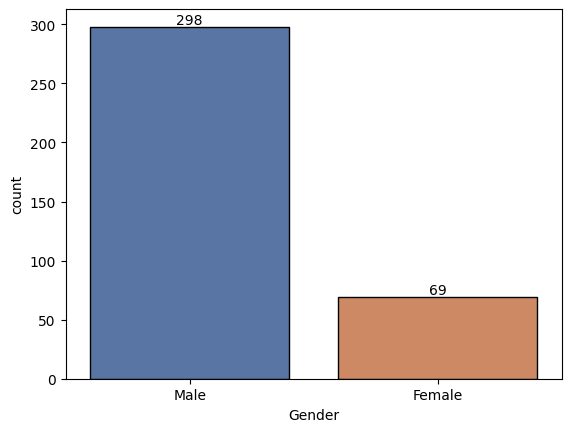

In [44]:
x= sns.countplot(data=df2,x='Gender', palette="deep",edgecolor='k')
for i in x.containers:
    x.bar_label(i)

# Observation:

Males count is moreand therefore, they are taking more loans as compared to females.

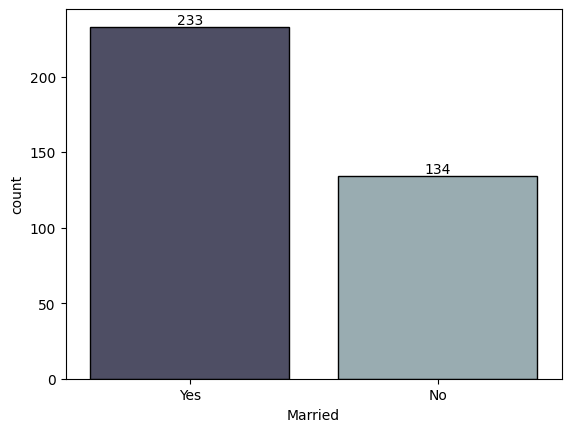

In [45]:
b = sns.countplot(x = 'Married', data = df2, palette = 'bone',edgecolor='k')
for i in b.containers:
    b.bar_label(i);

# Observation:
Married People are taking more loans as compared to unmarrieds.

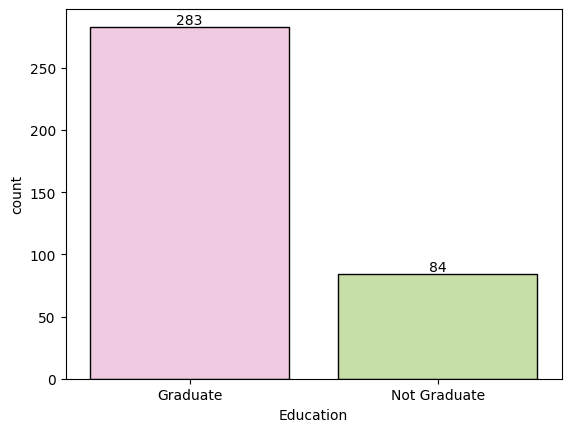

In [46]:
c= sns.countplot(x = 'Education', data = df2,palette = 'PiYG', edgecolor = 'k')
for i in c.containers:
    c.bar_label(i);

# Observation:
Graduates are more in number and they are taking more loans as compared to Non-Graduates.

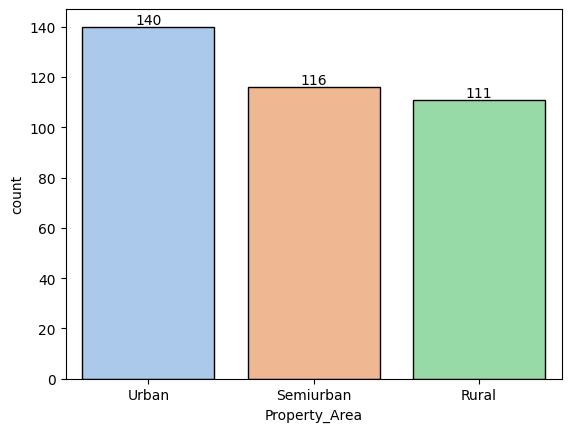

In [47]:
d = sns.countplot(x = 'Property_Area', data = df2, palette = 'pastel', edgecolor = 'k')
for i in d.containers:
    d.bar_label(i);

# Observations:
Rural people are taking less loans.

Urban People are taking more loans as compared to others.

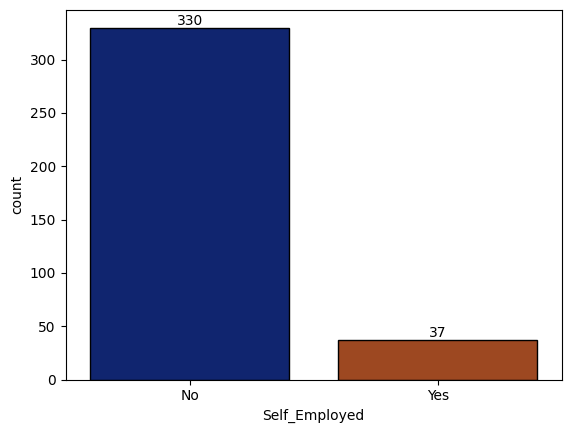

In [48]:
e = sns.countplot(x = 'Self_Employed', data = df2, palette = 'dark', edgecolor ='k')
for i in e.containers:
    e.bar_label(i);

# Observations:
Self Employed people are taking less loans.

Non-self Employed people are taking more loans.

# About Box Plot:

The median is an average. The larger median, the larger the average.

The range = maximum – minimum. The larger the range, the more spread the data is.

The IQR = Q3 – Q1. The larger the interquartile range, the more spread the middle 50% of the data is.

The spread of data refers to how spread out the numbers in the data are. Both the range and interquartile range are used to describe the spread of data.

The larger the range, the more spread the whole data is.

The larger the interquartile range, the more spread the middle 50% of data is.

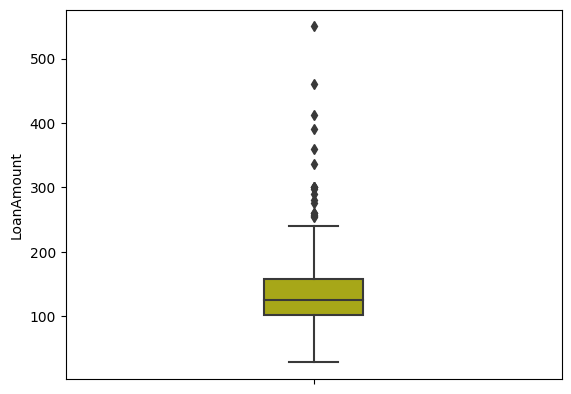

In [49]:
sns.boxplot(y ='LoanAmount', data = df2, width=0.2, color = 'y');

# Observations:

The Range of the data, it means the difference between maximum and minimum LoanAmount is from approximately from 20 to 220 .

Approximately, the Inter Quartile Range is in between 100 to 160, it means the middle 50% of the LoanAmount data is in between 100 to 160.

Approximately, above 220 of the LoanAmount all data points are considered as Outliers.

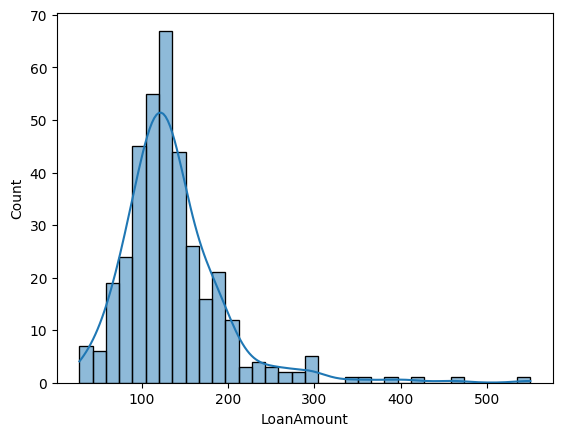

In [50]:
sns.histplot(x = 'LoanAmount', data = df2,kde=True);

# Observations:

Loan Amount follows Right-skewed Distribution (or) Positive Skew.

Most of the Loan amount is under 200 only.

Loan Amount has huge number of Outliers on right side.

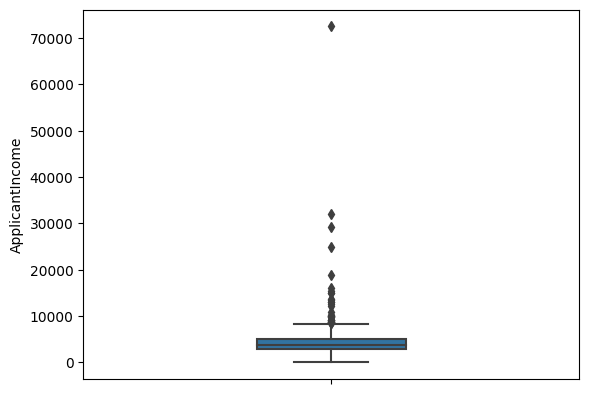

In [51]:
sns.boxplot(y = 'ApplicantIncome', data = df2,width = 0.3);

# Observations:

The Range of the data, it means the difference between maximum and minimum Applicant Income is from 0 to 8500 approximately.

The Inter Quartile Range is in between 2500 to 5000 approximately, it means the middle 50% of the Applicant Income data is in between 2500 to 5000 approximately.

Above 8500 of the Applicant Income, all data points are considered as Outliers.

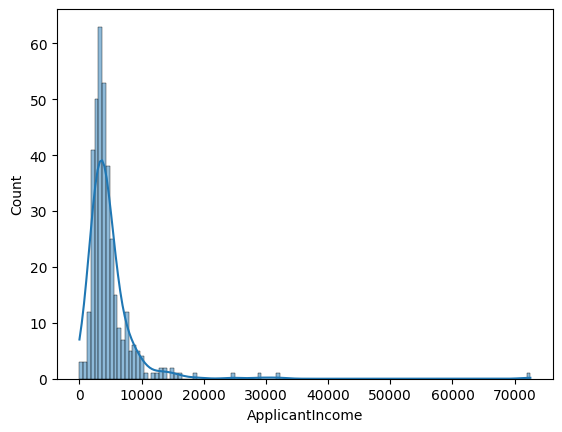

In [52]:
sns.histplot(x = 'ApplicantIncome', data = df2,kde=True);

# Observations:

Applicant Income follows Right-Skewed Distribution (or) Positive Skewness.

Most of the Applicant income is under 10000 only.

Applicant Income has huge number of Outliers on right side.

# Bivariate Analysis:

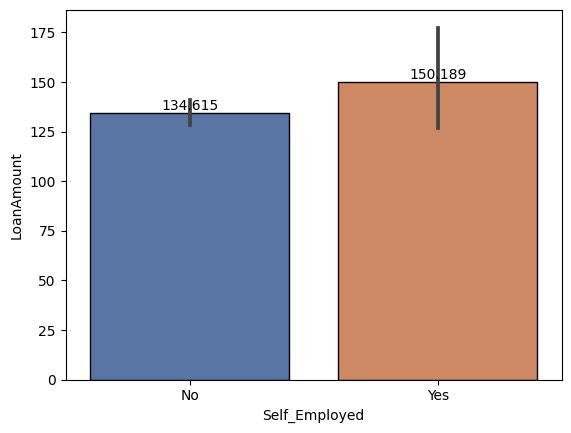

In [53]:
a = sns.barplot(x ='Self_Employed', y = 'LoanAmount', data = df2, palette = 'deep', edgecolor ='k')
for i in a.containers:
    a.bar_label(i);

# Observation:
    
Loan Amount for Self Employed People is more as compared to Non-Self Employed People.

C:\Users\HP\AppData\Local\Temp\ipykernel_38644\1402382813.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  b = sns.barplot(y ='LoanAmount', x = 'Property_Area', data = df2, order = ['Rural', 'Urban', 'Semiurban'], palette ='summer',edgecolor = 'k', ci = None)


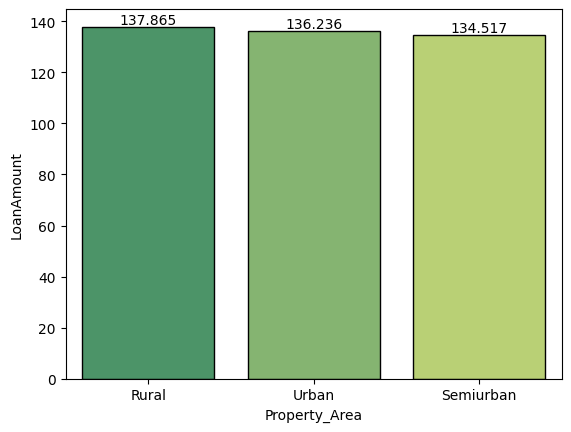

In [54]:
b = sns.barplot(y ='LoanAmount', x = 'Property_Area', data = df2, order = ['Rural', 'Urban', 'Semiurban'], palette ='summer',edgecolor = 'k', ci = None)
for i in b.containers:
    b.bar_label(i);

# Observation:

Loan Amount for Rural People is more as compared to other People.

C:\Users\HP\AppData\Local\Temp\ipykernel_38644\260450177.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  c = sns.barplot(x ='Self_Employed', y = 'ApplicantIncome', data = df2, palette = 'flare', ec = 'k', ci = None)


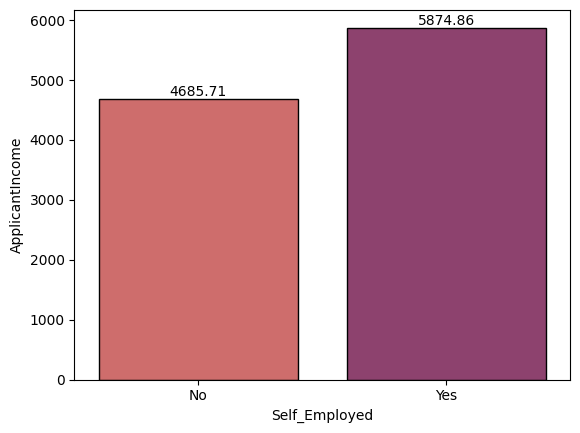

In [55]:
c = sns.barplot(x ='Self_Employed', y = 'ApplicantIncome', data = df2, palette = 'flare', ec = 'k', ci = None)
for i in c.containers:
    c.bar_label(i);

C:\Users\HP\AppData\Local\Temp\ipykernel_38644\2037056976.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  d = sns.barplot(x ='Gender', y = 'ApplicantIncome', data = df2, palette = 'Set2', ec = 'k', ci = None)


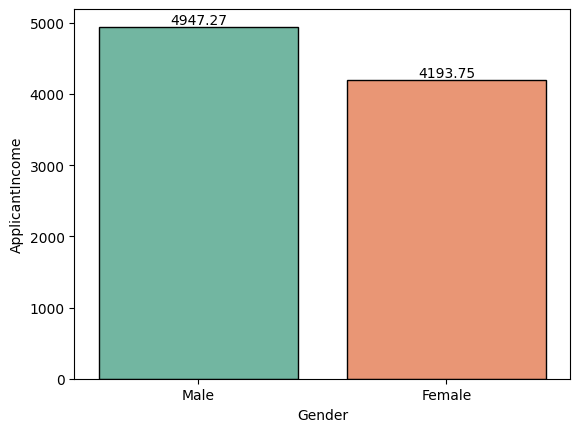

In [56]:
d = sns.barplot(x ='Gender', y = 'ApplicantIncome', data = df2, palette = 'Set2', ec = 'k', ci = None)
for i in d.containers:
    d.bar_label(i);

# Observation:

Income of male is more as compared to Females .

C:\Users\HP\AppData\Local\Temp\ipykernel_38644\1547833150.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  e = sns.barplot(x ='Married', y = 'ApplicantIncome', data = df2, palette = 'ocean', ec = 'k', ci = None)


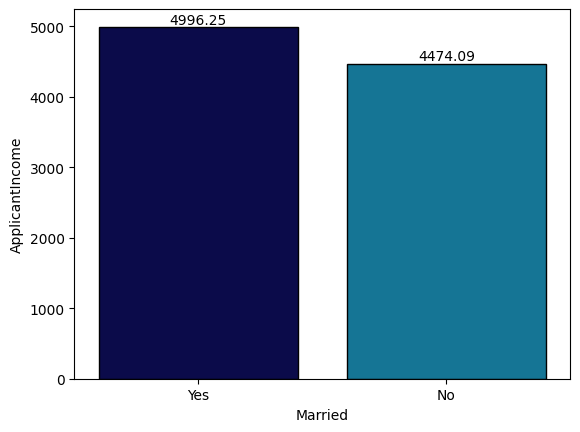

In [57]:
e = sns.barplot(x ='Married', y = 'ApplicantIncome', data = df2, palette = 'ocean', ec = 'k', ci = None)
for i in e.containers:
    e.bar_label(i);

# Observation:

Married People Income is more as compared to singles Income.

C:\Users\HP\AppData\Local\Temp\ipykernel_38644\3611219324.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  f = sns.barplot(x ='Education', y = 'ApplicantIncome', data = df2, palette = 'twilight', ec = 'k', ci = None)


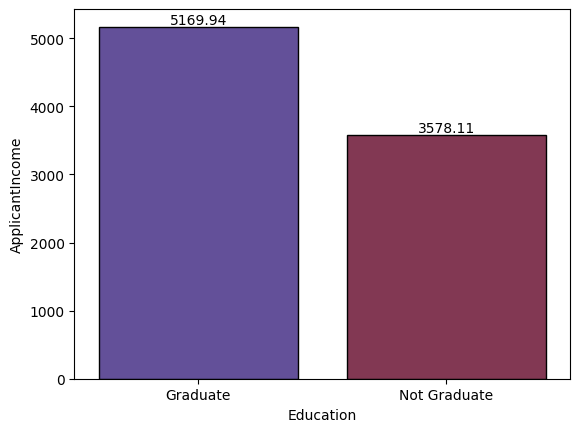

In [58]:
f = sns.barplot(x ='Education', y = 'ApplicantIncome', data = df2, palette = 'twilight', ec = 'k', ci = None)
for i in f.containers:
    f.bar_label(i);

C:\Users\HP\AppData\Local\Temp\ipykernel_38644\112974651.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.barplot(x ='Dependents', y = 'LoanAmount', data = df2, palette = 'PiYG', edgecolor ='k', ci = None)


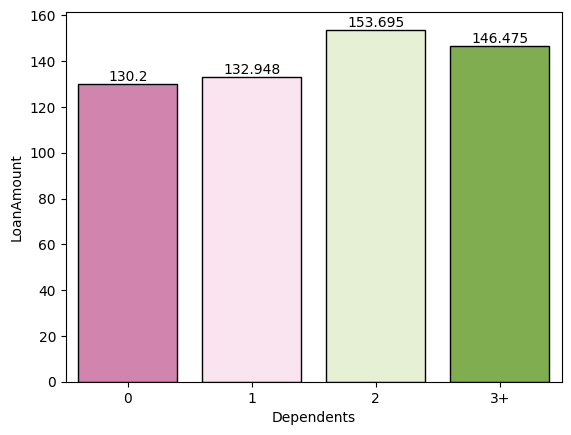

In [59]:
g = sns.barplot(x ='Dependents', y = 'LoanAmount', data = df2, palette = 'PiYG', edgecolor ='k', ci = None)
for i in g.containers:
    g.bar_label(i);

# Note:

The more dependents you have, lesser will be the disposable income and it is likely that lesser will be your capacity to repay the loan.

# Observation:

Highest Loan Amount is given to Applicant is having 2 dependents.

Then for 3+ dependents, Loan amount is given more.

C:\Users\HP\AppData\Local\Temp\ipykernel_38644\212277967.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  h = sns.barplot(x ='Dependents', y = 'ApplicantIncome', data = df2, palette = 'flag', edgecolor = 'k', ci = None)


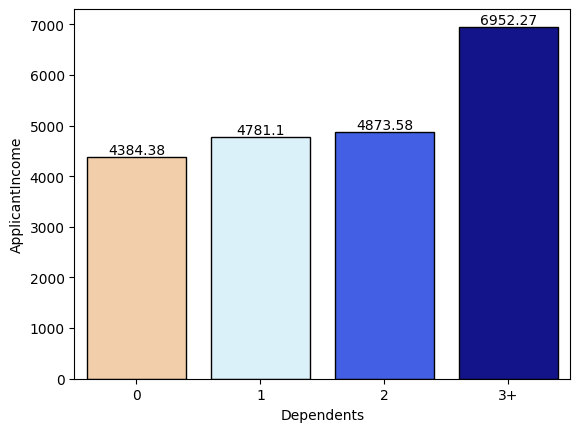

In [60]:
h = sns.barplot(x ='Dependents', y = 'ApplicantIncome', data = df2, palette = 'flag', edgecolor = 'k', ci = None)
for i in h.containers:
    h.bar_label(i);

# Observation:

Income for Applicant who is having 3+ dependents is high.

Applicant who has no dependents get less Income.

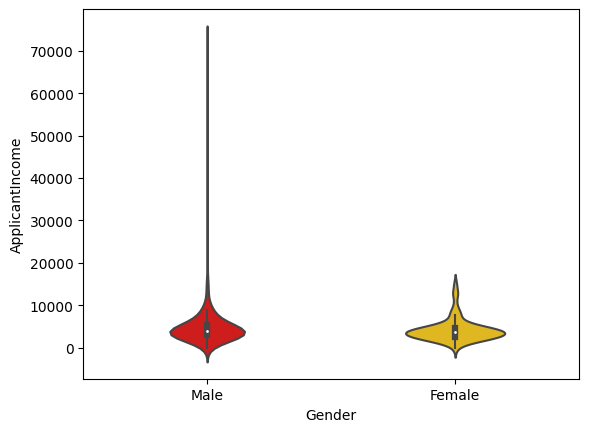

In [61]:
sns.violinplot(x = 'Gender', y = 'ApplicantIncome', data = df2,width = 0.4, palette = 'hot');

# Observation:

Males have high Income as compared to Females.

C:\Users\HP\miniconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 20.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\HP\miniconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 41.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\HP\miniconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 24.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


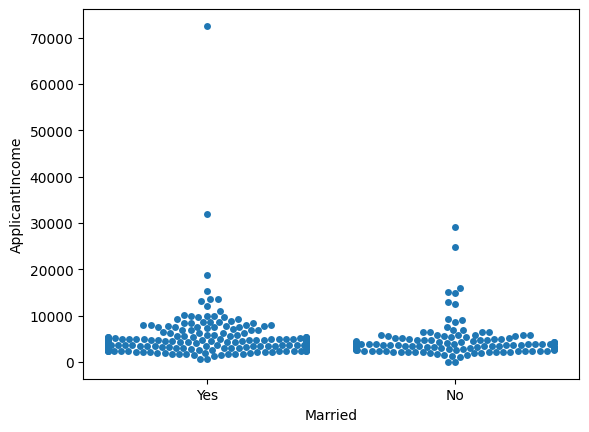

In [62]:
sns.swarmplot(x = 'Married', y = 'ApplicantIncome', data = df2);

# Observation:

Married People are having More Income as compared to Singles.

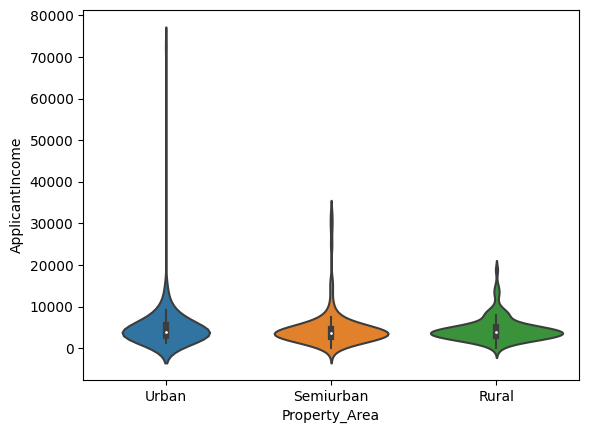

In [63]:
sns.violinplot(x = 'Property_Area', y = 'ApplicantIncome', data = df2,width = 0.8);

# Observation:

Urban People are having high Income as compared to Rural and Semiurban People.

C:\Users\HP\AppData\Local\Temp\ipykernel_38644\670416949.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  l = sns.barplot(x ='Education', y = 'ApplicantIncome', data = df2, hue = 'Self_Employed', palette = 'spring', ec = 'k', ci = None)


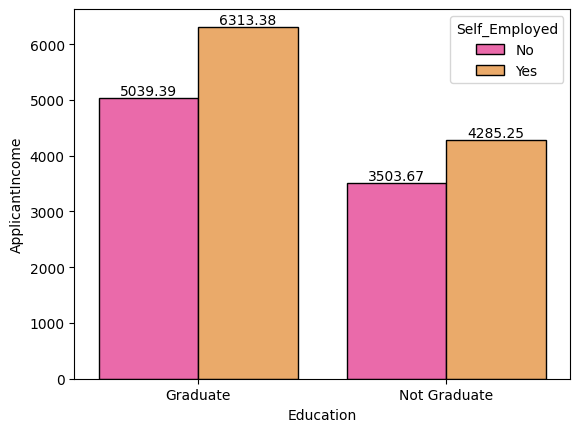

In [64]:
l = sns.barplot(x ='Education', y = 'ApplicantIncome', data = df2, hue = 'Self_Employed', palette = 'spring', ec = 'k', ci = None)
for i in l.containers:
    l.bar_label(i);

# Observations:

Graduate who is Self_Employed is having More Income as compared to Graduate who is Non-Self Employed.

Non Graduate who is Self_Employed is having More Income as compared to Non Graduate who is Non-Self Employed.